In [1]:
import numpy as np
import pandas as pd

In [4]:
customers_df=pd.read_csv('Customer.csv')
customers_df

customer_Id         DOB Gender  city_code
0          268408  02-01-1970      M        4.0
1          269696  07-01-1970      F        8.0
2          268159  08-01-1970      F        8.0
3          270181  10-01-1970      F        2.0
4          268073  11-01-1970      M        1.0
...           ...         ...    ...        ...
5642       274474  19-12-1992      M        2.0
5643       267666  24-12-1992      M        6.0
5644       270476  25-12-1992      F        3.0
5645       269626  27-12-1992      F        5.0
5646       274308  29-12-1992      F        5.0

[5647 rows x 4 columns]

In [5]:
transactions_df=pd.read_csv('Transactions.csv')
transactions_df

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         29258453508   270384  27-02-2014                 5              3   
2         51750724947   273420  24-02-2014                 6              5   
3         93274880719   271509  24-02-2014                11              6   
4         51750724947   273420  23-02-2014                 6              5   
...               ...      ...         ...               ...            ...   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type  
0       -5  -772  405.300  -4265.300     e-Shop  
1       -5 -1497  785.925  -8270.925     e-Shop  
2       -2  -791  166.110  -1748.110   TeleShop  
3       -3 -1363  429.345  -4518.345     e-Shop  
4       -2  -791  166.110  -1748.110   TeleShop  
...    ...   ...      ...        ...        ...  
23048    1  1264  132.720   1396.720     e-Shop  
23049    1   677   71.085    748.085     e-Shop  
23050    4  1052  441.840   4649.840        MBR  
23051    3  1142  359.730   3785.730   TeleShop  
23052    1   447   46.935    493.935   TeleShop  

[23053 rows x 10 columns]

In [6]:
prod_heirarchy_df=pd.read_csv('prod_cat_info.csv')
prod_heirarchy_df

prod_cat_code          prod_cat  prod_sub_cat_code          prod_subcat
0               1          Clothing                  4                 Mens
1               1          Clothing                  1                Women
2               1          Clothing                  3                 Kids
3               2          Footwear                  1                 Mens
4               2          Footwear                  3                Women
5               2          Footwear                  4                 Kids
6               3       Electronics                  4              Mobiles
7               3       Electronics                  5            Computers
8               3       Electronics                  8  Personal Appliances
9               3       Electronics                  9              Cameras
10              3       Electronics                 10      Audio and video
11              4              Bags                  1                 Mens
12              4              Bags                  4                Women
13              5             Books                  7              Fiction
14              5             Books                 12             Academic
15              5             Books                 10          Non-Fiction
16              5             Books                 11             Children
17              5             Books                  3               Comics
18              5             Books                  6                  DIY
19              6  Home and kitchen                  2           Furnishing
20              6  Home and kitchen                 10              Kitchen
21              6  Home and kitchen                 11                 Bath
22              6  Home and kitchen                 12                Tools

In [11]:
#1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly


customers_transactions_df = pd.merge(transactions_df, customers_df, how="left", left_on="cust_id", right_on="customer_Id")
Customer_Final_df = pd.merge(customers_transactions_df, prod_heirarchy_df, how="left", left_on="prod_cat_code", right_on="prod_cat_code")
Customer_Final_df

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         80712190438   270351  28-02-2014                 1              1   
2         80712190438   270351  28-02-2014                 1              1   
3         29258453508   270384  27-02-2014                 5              3   
4         29258453508   270384  27-02-2014                 5              3   
...               ...      ...         ...               ...            ...   
99288     77960931771   271961  25-01-2011                11              5   
99289     77960931771   271961  25-01-2011                11              5   
99290     77960931771   271961  25-01-2011                11              5   
99291     77960931771   271961  25-01-2011                11              5   
99292     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type  customer_Id         DOB  \
0       -5  -772  405.300  -4265.300     e-Shop       270351  26-09-1981   
1       -5  -772  405.300  -4265.300     e-Shop       270351  26-09-1981   
2       -5  -772  405.300  -4265.300     e-Shop       270351  26-09-1981   
3       -5 -1497  785.925  -8270.925     e-Shop       270384  11-05-1973   
4       -5 -1497  785.925  -8270.925     e-Shop       270384  11-05-1973   
...    ...   ...      ...        ...        ...          ...         ...   
99288    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99289    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99290    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99291    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99292    1   447   46.935    493.935   TeleShop       271961  15-01-1982   

      Gender  city_code     prod_cat  prod_sub_cat_code  prod_subcat  
0          M        5.0     Clothing                  4         Mens  
1          M        5.0     Clothing                  1        Women  
2          M        5.0     Clothing                  3         Kids  
3          F        8.0  Electronics                  4      Mobiles  
4          F        8.0  Electronics                  5    Computers  
...      ...        ...          ...                ...          ...  
99288      M        1.0        Books                 12     Academic  
99289      M        1.0        Books                 10  Non-Fiction  
99290      M        1.0        Books                 11     Children  
99291      M        1.0        Books                  3       Comics  
99292      M        1.0        Books                  6          DIY  

[99293 rows x 17 columns]

In [13]:
#2. Prepare a summary report for the merged data set.
#a. Get the column names and their corresponding data types

column_info = Customer_Final_df.dtypes.rename("Data Type")
column_info

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
Name: Data Type, dtype: object

In [15]:
# b. Top/Bottom 10 observations

top_10 = Customer_Final_df.head(10)
top_10

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  28-02-2014                 1              1   -5   
2     80712190438   270351  28-02-2014                 1              1   -5   
3     29258453508   270384  27-02-2014                 5              3   -5   
4     29258453508   270384  27-02-2014                 5              3   -5   
5     29258453508   270384  27-02-2014                 5              3   -5   
6     29258453508   270384  27-02-2014                 5              3   -5   
7     29258453508   270384  27-02-2014                 5              3   -5   
8     51750724947   273420  24-02-2014                 6              5   -2   
9     51750724947   273420  24-02-2014                 6              5   -2   

   Rate      Tax  total_amt Store_type  customer_Id         DOB Gender  \
0  -772  405.300  -4265.300     e-Shop       270351  26-09-1981      M   
1  -772  405.300  -4265.300     e-Shop       270351  26-09-1981      M   
2  -772  405.300  -4265.300     e-Shop       270351  26-09-1981      M   
3 -1497  785.925  -8270.925     e-Shop       270384  11-05-1973      F   
4 -1497  785.925  -8270.925     e-Shop       270384  11-05-1973      F   
5 -1497  785.925  -8270.925     e-Shop       270384  11-05-1973      F   
6 -1497  785.925  -8270.925     e-Shop       270384  11-05-1973      F   
7 -1497  785.925  -8270.925     e-Shop       270384  11-05-1973      F   
8  -791  166.110  -1748.110   TeleShop       273420  27-07-1992      M   
9  -791  166.110  -1748.110   TeleShop       273420  27-07-1992      M   

   city_code     prod_cat  prod_sub_cat_code          prod_subcat  
0        5.0     Clothing                  4                 Mens  
1        5.0     Clothing                  1                Women  
2        5.0     Clothing                  3                 Kids  
3        8.0  Electronics                  4              Mobiles  
4        8.0  Electronics                  5            Computers  
5        8.0  Electronics                  8  Personal Appliances  
6        8.0  Electronics                  9              Cameras  
7        8.0  Electronics                 10      Audio and video  
8        8.0        Books                  7              Fiction  
9        8.0        Books                 12             Academic

In [17]:
# c. Bottom 10 observations

bottom_10 = Customer_Final_df.tail(10)
bottom_10

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
99283     72870271171   270911  25-01-2011                11              5   
99284     72870271171   270911  25-01-2011                11              5   
99285     72870271171   270911  25-01-2011                11              5   
99286     72870271171   270911  25-01-2011                11              5   
99287     77960931771   271961  25-01-2011                11              5   
99288     77960931771   271961  25-01-2011                11              5   
99289     77960931771   271961  25-01-2011                11              5   
99290     77960931771   271961  25-01-2011                11              5   
99291     77960931771   271961  25-01-2011                11              5   
99292     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type  customer_Id         DOB  \
99283    3  1142  359.730   3785.730   TeleShop       270911  22-05-1970   
99284    3  1142  359.730   3785.730   TeleShop       270911  22-05-1970   
99285    3  1142  359.730   3785.730   TeleShop       270911  22-05-1970   
99286    3  1142  359.730   3785.730   TeleShop       270911  22-05-1970   
99287    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99288    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99289    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99290    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99291    1   447   46.935    493.935   TeleShop       271961  15-01-1982   
99292    1   447   46.935    493.935   TeleShop       271961  15-01-1982   

      Gender  city_code prod_cat  prod_sub_cat_code  prod_subcat  
99283      M        2.0    Books                 10  Non-Fiction  
99284      M        2.0    Books                 11     Children  
99285      M        2.0    Books                  3       Comics  
99286      M        2.0    Books                  6          DIY  
99287      M        1.0    Books                  7      Fiction  
99288      M        1.0    Books                 12     Academic  
99289      M        1.0    Books                 10  Non-Fiction  
99290      M        1.0    Books                 11     Children  
99291      M        1.0    Books                  3       Comics  
99292      M        1.0    Books                  6          DIY

In [22]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

five_number_summary = Customer_Final_df.describe().transpose()
five_number_summary

count          mean           std          min  \
transaction_id     99293.0  5.007320e+10  2.899361e+10  3268991.000   
cust_id            99293.0  2.710300e+05  2.429334e+03   266783.000   
prod_subcat_code   99293.0  6.796894e+00  3.609439e+00        1.000   
prod_cat_code      99293.0  4.003243e+00  1.563991e+00        1.000   
Qty                99293.0  2.438017e+00  2.260726e+00       -5.000   
Rate               99293.0  6.379199e+02  6.215763e+02    -1499.000   
Tax                99293.0  2.488737e+02  1.870144e+02        7.350   
total_amt          99293.0  2.114616e+03  2.502307e+03    -8270.925   
customer_Id        99293.0  2.710300e+05  2.429334e+03   266783.000   
city_code          99257.0  5.467221e+00  2.859343e+00        1.000   
prod_sub_cat_code  99293.0  6.806985e+00  3.615952e+00        1.000   

                            25%           50%           75%           max  
transaction_id     2.492150e+10  5.011083e+10  7.528121e+10  9.998755e+10  
cust_id            2.689560e+05  2.709820e+05  2.731200e+05  2.752650e+05  
prod_subcat_code   4.000000e+00  7.000000e+00  1.000000e+01  1.200000e+01  
prod_cat_code      3.000000e+00  5.000000e+00  5.000000e+00  6.000000e+00  
Qty                1.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
Rate               3.130000e+02  7.130000e+02  1.109000e+03  1.500000e+03  
Tax                9.828000e+01  1.999200e+02  3.669750e+02  7.875000e+02  
total_amt          7.624500e+02  1.761370e+03  3.585725e+03  8.287500e+03  
customer_Id        2.689560e+05  2.709820e+05  2.731200e+05  2.752650e+05  
city_code          3.000000e+00  5.000000e+00  8.000000e+00  1.000000e+01  
prod_sub_cat_code  4.000000e+00  7.000000e+00  1.000000e+01  1.200000e+01

In [25]:
#d. Frequency tables for all the categorical variables

categorical_freq_tables = {}
categorical_columns = Customer_Final_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    categorical_freq_tables[column] = Customer_Final_df[column].value_counts()
print("\nFrequency Tables for Categorical Variables:")
for column, freq_table in categorical_freq_tables.items():
    print(f"\n{column}:\n{freq_table}")


Frequency Tables for Categorical Variables:

tran_date:
tran_date
25-08-2012    153
13-07-2011    144
25-09-2011    144
3/2/2014      142
21-12-2013    141
             ... 
23-02-2014     11
24-02-2014     10
27-02-2014      5
21-02-2014      5
28-02-2014      3
Name: count, Length: 1129, dtype: int64

Store_type:
Store_type
e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: count, dtype: int64

DOB:
DOB
27-12-1988    156
17-09-1982    134
25-02-1974    126
18-11-1991    114
09-06-1970    107
             ... 
26-09-1983      2
09-05-1976      2
18-12-1973      2
26-02-1981      2
13-05-1981      2
Name: count, Length: 3987, dtype: int64

Gender:
Gender
M    51051
F    48202
Name: count, dtype: int64

prod_cat:
prod_cat
Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: count, dtype: int64

prod_subcat:
prod_subcat
Mens     

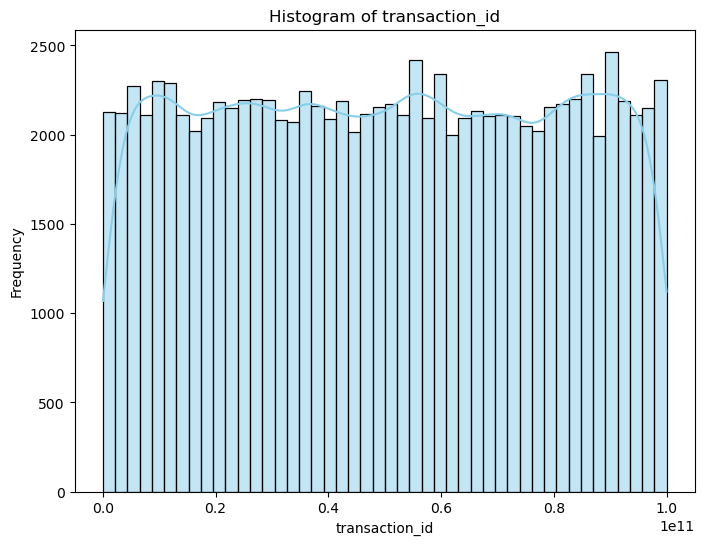

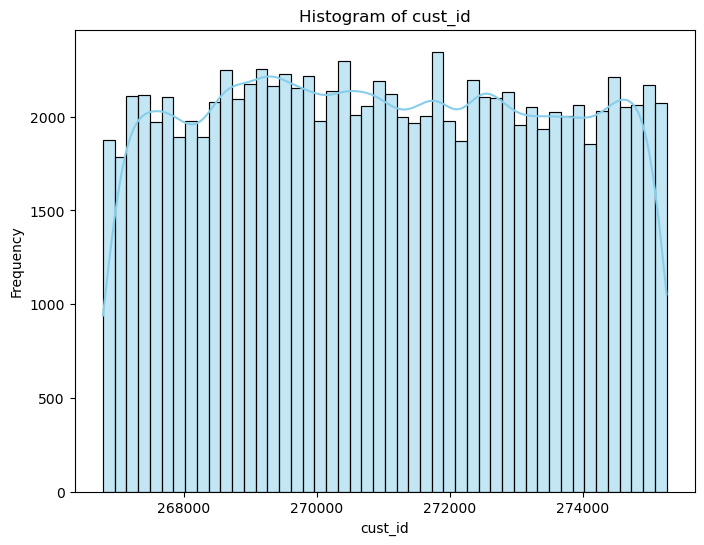

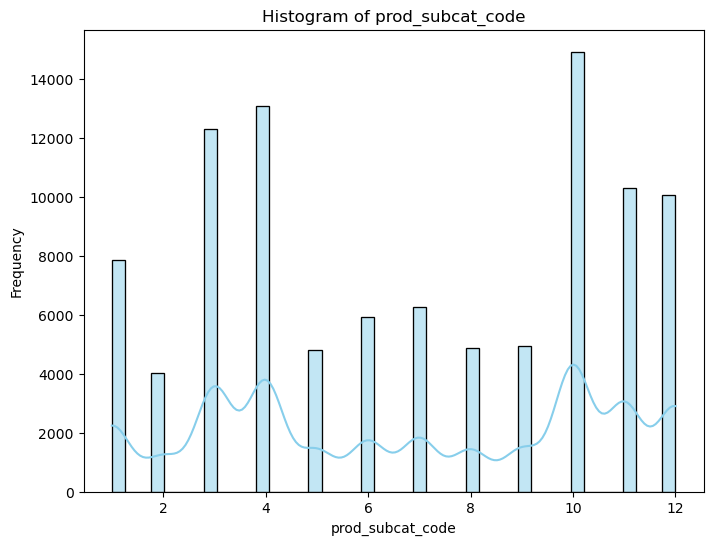

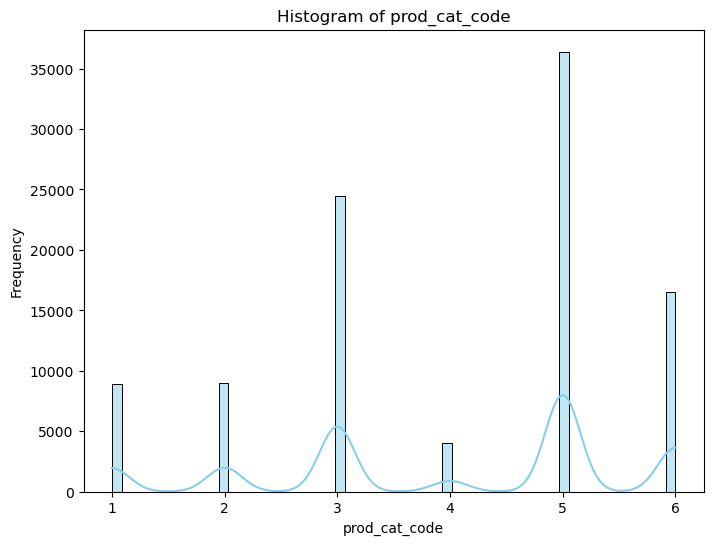

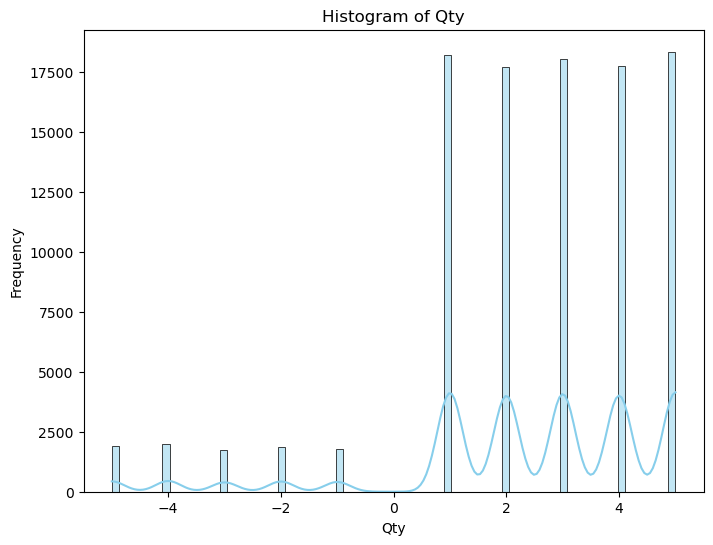

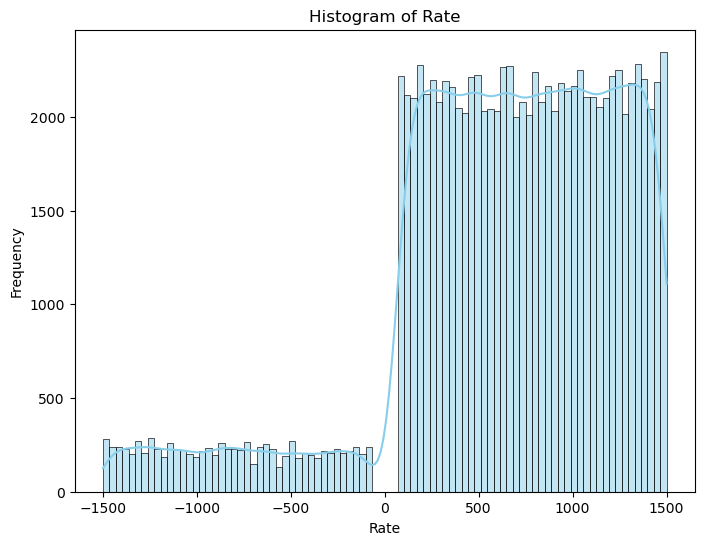

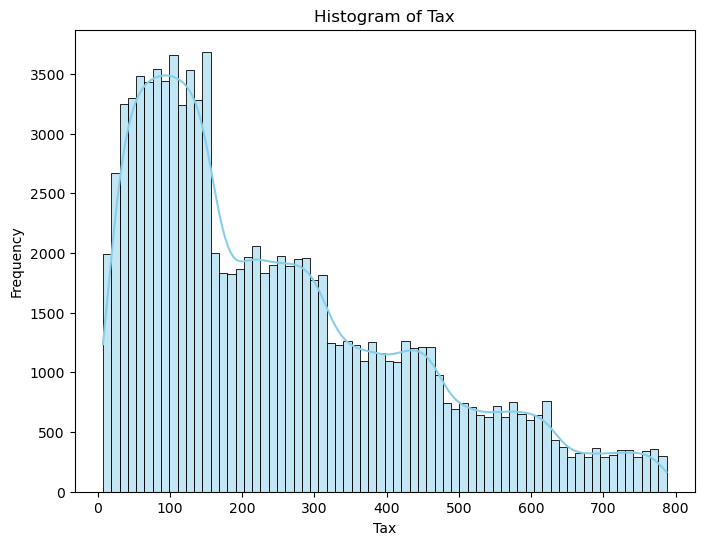

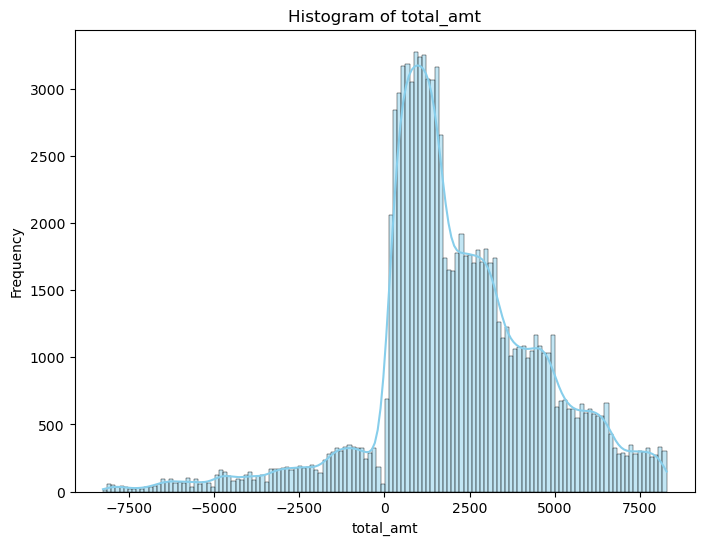

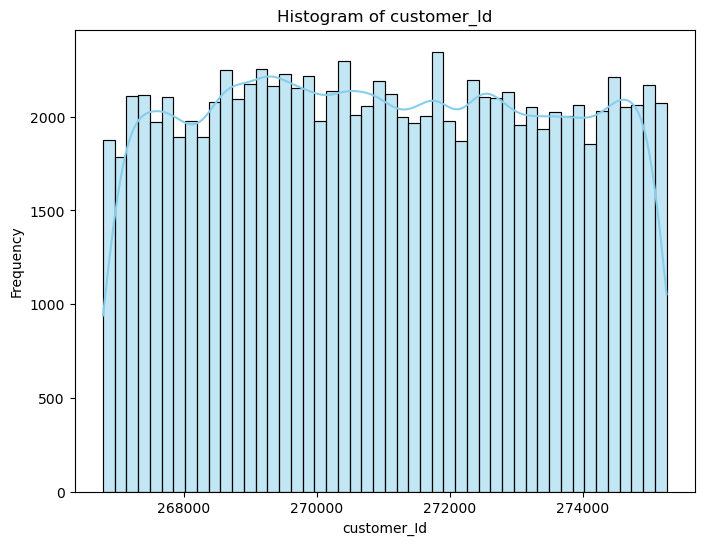

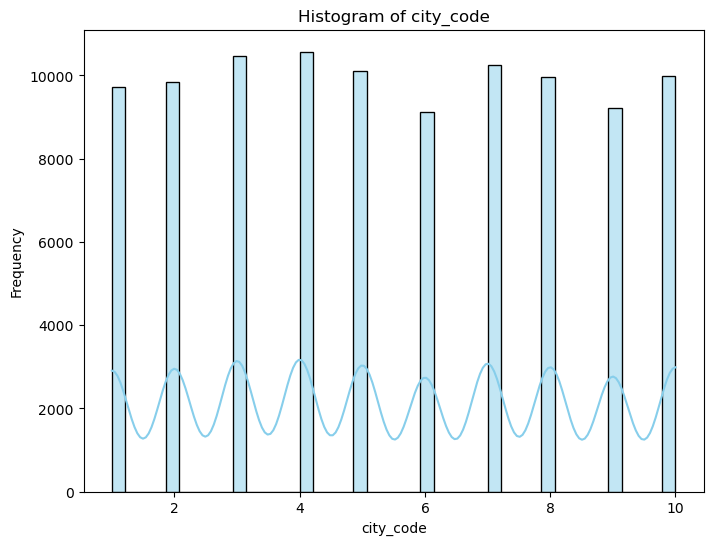

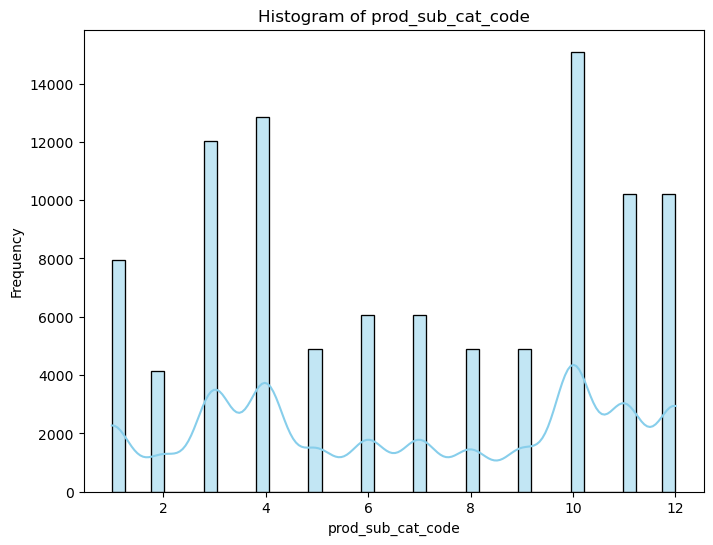

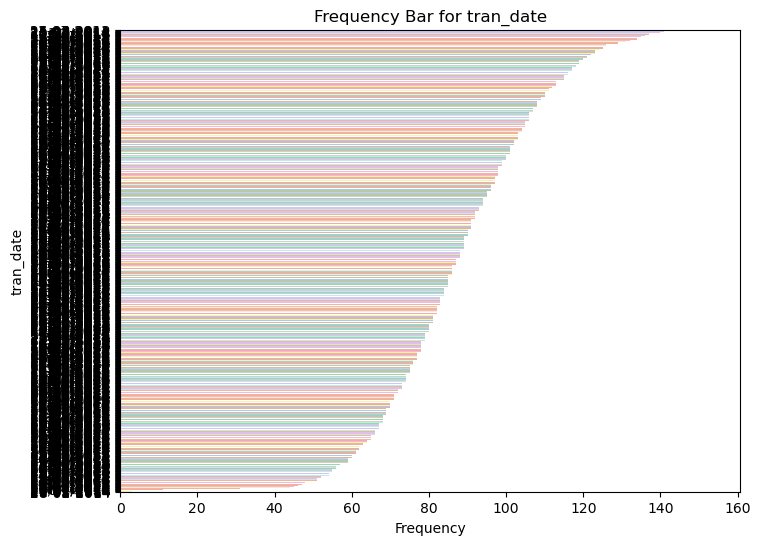

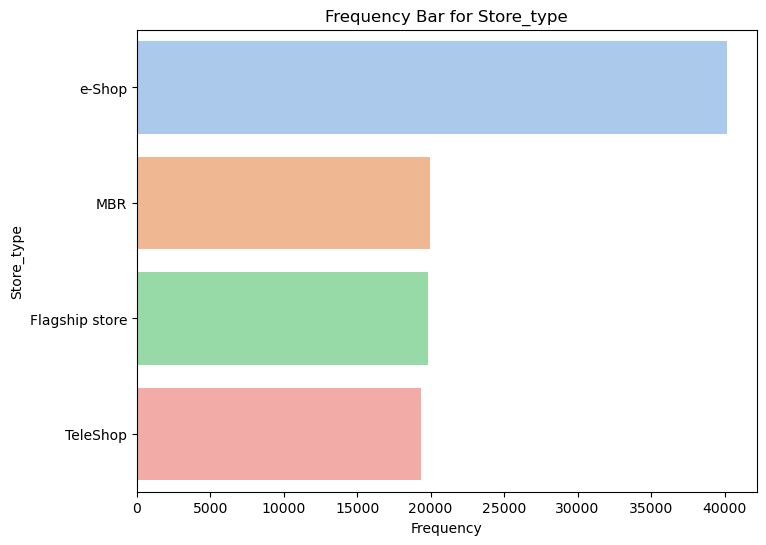

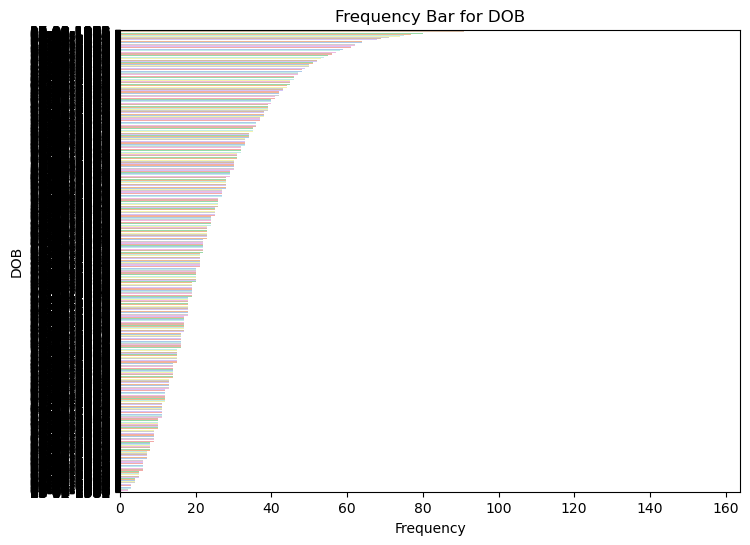

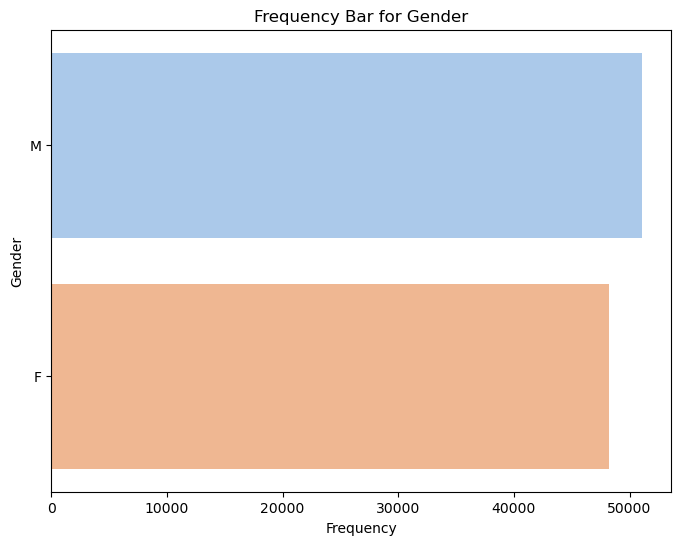

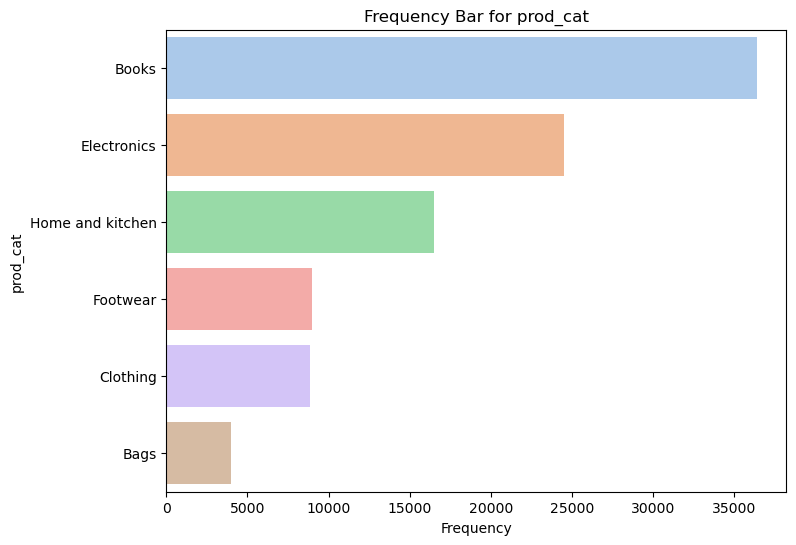

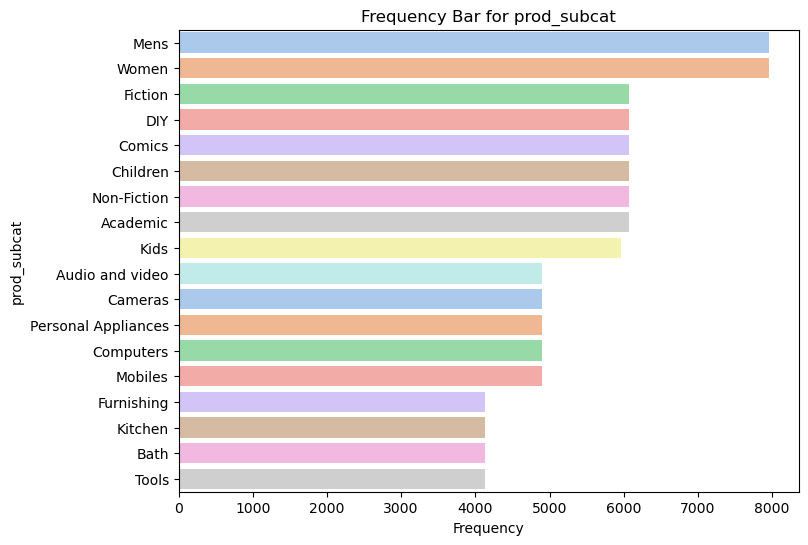

In [26]:
#3. Generate histograms for all continuous variables and frequency bars for categorical variables

import matplotlib.pyplot as plt
import seaborn as sns

continuous_vars = Customer_Final_df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = Customer_Final_df.select_dtypes(include=['object']).columns

for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(Customer_Final_df[var], kde=True, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=Customer_Final_df[var], order=Customer_Final_df[var].value_counts().index, palette='pastel')
    plt.title(f'Frequency Bar for {var}')
    plt.xlabel('Frequency')
    plt.ylabel(var)
    plt.show()


In [44]:
#4. Calculate the following information using the merged dataset :
# a. Time period of the available transaction data

import pandas as pd

# Define the formats to try
formats = ["%d-%m-%Y", "%d/%m/%Y"]

# Attempt to convert dates using the first format
Customer_Final_df['tran_date'] = pd.to_datetime(Customer_Final_df['tran_date'], format=formats[0], errors='coerce')

# Identify the rows with NaT (Not a Time) values, indicating unsuccessful conversion
rows_with_errors = Customer_Final_df['tran_date'].isnull()

# For the rows with conversion errors, try the alternative format
Customer_Final_df.loc[rows_with_errors, 'tran_date'] = pd.to_datetime(Customer_Final_df.loc[rows_with_errors, 'tran_date'], format=formats[1], errors='coerce')

# Find the minimum and maximum transaction dates
min_date = Customer_Final_df['tran_date'].min()
max_date = Customer_Final_df['tran_date'].max()

# Calculate the time period
time_period = max_date - min_date

# Display the time period
print("Time period of the available transaction data:", time_period.days, "days")


Time period of the available transaction data: 1130 days


In [34]:
#4. Calculate the following information using the merged dataset :
# b. Count of transactions where the total amount of transaction was negative

negative_transactions_count = Customer_Final_df[Customer_Final_df['total_amt'] < 0].shape[0]
print("Count of transactions where the total amount of transaction was negative:", negative_transactions_count)



Count of transactions where the total amount of transaction was negative: 9294


In [46]:
#5. Analyze which product categories are more popular among females vs male customers

gender_category_totals = Customer_Final_df.groupby(['Gender', 'prod_cat']).agg({'total_amt': 'sum'})

gender_category_totals.reset_index(inplace=True)

male_totals = gender_category_totals[gender_category_totals['Gender'] == 'M']
female_totals = gender_category_totals[gender_category_totals['Gender'] == 'F']

most_popular_male_category = male_totals.loc[male_totals['total_amt'].idxmax()]
most_popular_female_category = female_totals.loc[female_totals['total_amt'].idxmax()]

print("Most popular product category among male customers:", most_popular_male_category['prod_cat'])
print("Most popular product category among female customers:", most_popular_female_category['prod_cat'])


Most popular product category among male customers: Books
Most popular product category among female customers: Books


In [48]:
# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

city_customers_count = Customer_Final_df.groupby('city_code')['customer_Id'].nunique()

max_customers_city_code = city_customers_count.idxmax()
max_customers_count = city_customers_count[max_customers_city_code]

total_customers = Customer_Final_df['customer_Id'].nunique()
percentage_max_customers = (max_customers_count / total_customers) * 100

print("City code with the maximum customers:", max_customers_city_code)
print("Percentage of customers from that city: {:.2f}%".format(percentage_max_customers))


City code with the maximum customers: 3.0
Percentage of customers from that city: 10.46%


In [49]:
#7. Which store type sells the maximum products by value and by quantity?

store_type_sales = Customer_Final_df.groupby('Store_type').agg({'total_amt': 'sum', 'Qty': 'sum'})

max_sales_by_value_store_type = store_type_sales['total_amt'].idxmax()
max_sales_by_quantity_store_type = store_type_sales['Qty'].idxmax()

print("Store type that sells the maximum products by value:", max_sales_by_value_store_type)
print("Store type that sells the maximum products by quantity:", max_sales_by_quantity_store_type)


Store type that sells the maximum products by value: e-Shop
Store type that sells the maximum products by quantity: e-Shop


In [50]:
#8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

flagship_sales = Customer_Final_df[(Customer_Final_df['Store_type'] == 'Flagship store') & (Customer_Final_df['prod_cat'].isin(['Electronics', 'Clothing']))]

total_amount_flagship_sales = flagship_sales['total_amt'].sum()

print("Total amount earned from Electronics and Clothing categories in Flagship Stores:", total_amount_flagship_sales)


Total amount earned from Electronics and Clothing categories in Flagship Stores: 14658949.89


In [51]:
#9. What was the total amount earned from "Male" customers under the "Electronics" category?


male_electronics_sales = Customer_Final_df[(Customer_Final_df['Gender'] == 'M') & (Customer_Final_df['prod_cat'] == 'Electronics')]

total_amount_male_electronics_sales = male_electronics_sales['total_amt'].sum()

print("Total amount earned from Electronics category by Male customers:", total_amount_male_electronics_sales)


Total amount earned from Electronics category by Male customers: 28515547.125


In [52]:
#10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?



positive_transactions = Customer_Final_df[Customer_Final_df['total_amt'] >= 0]
positive_transactions_per_customer = positive_transactions.groupby('cust_id').size()
customers_with_more_than_10_transactions = positive_transactions_per_customer[positive_transactions_per_customer > 10]
num_customers_with_more_than_10_transactions = len(customers_with_more_than_10_transactions)
print("Number of customers with more than 10 unique transactions after removing negative amounts:", num_customers_with_more_than_10_transactions)


Number of customers with more than 10 unique transactions after removing negative amounts: 4019


In [57]:
#11. For all customers aged between 25 - 35, find out:
# a. What was the total amount spent for “Electronics” and “Books” product categories?
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

import pandas as pd
from datetime import datetime, timedelta


data = {'DOB': ["26-09-1981", "10/03/1990", "15-07-1985", "22/11/1978"],}

Customer_Final_df = pd.DataFrame(data)

def parse_dob(date_str):
    return pd.to_datetime(date_str, format='%d-%m-%y', errors='coerce')

Customer_Final_df['Age'] = (datetime.now() - Customer_Final_df['DOB'].apply(parse_dob)) // timedelta(days=365)

print(Customer_Final_df)


          DOB  Age
0  26-09-1981  NaN
1  10/03/1990  NaN
2  15-07-1985  NaN
3  22/11/1978  NaN
